In [1]:
# import
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.option_context('mode.use_inf_as_na', True)
plt.rcParams.update({'font.size': 14})

In [2]:
# read files
dirpath = os.getcwd()
features_path = r"C:\Users\marie\rep_codes\udder_project\udder_processing\features_dict\gmfeature_table.csv"
data_path = r"C:\Users\marie\rep_codes\udder_project\delpro_vms\data_out"
plot_dir = os.path.join(os.path.normpath(dirpath + os.sep + os.pardir),r"adsa\examples")

fdf = pd.read_csv(features_path)
fdf[fdf.columns[3:]] = fdf[fdf.columns[3:]].apply(pd.to_numeric, errors='coerce')
ddf = pd.read_csv(os.path.join(data_path, "mko_integrated.csv"))

In [3]:
# merge files 
df = fdf.merge(ddf, on = ["cow"], how = "left")
df["ko_cow"] = [1 if df.iloc[i].dko_udder_dim_cl > 5 else 0 for i in range(len(df.cow))]
df["ko_back"] = [1 if (df.iloc[i].dko_lb_dim_cl > 5) |  (df.iloc[i].dko_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_front"] = [1 if (df.iloc[i].dko_lf_dim_cl > 5) |  (df.iloc[i].dko_rf_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_right"] = [1 if (df.iloc[i].dko_rf_dim_cl > 5) |  (df.iloc[i].dko_rb_dim_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_left"] = [1 if (df.iloc[i].dko_lf_dim_cl > 5) |  (df.iloc[i].dko_lb_dim_cl > 5) else 0 for i in range(len(df.cow))]

df["ko_vcow"] = [1 if df.iloc[i].vko_udder_nv_cl > 5 else 0 for i in range(len(df.cow))]
df["ko_vback"] = [1 if (df.iloc[i].vko_lb_nv_cl > 5) |  (df.iloc[i].vko_rb_nv_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_vfront"] = [1 if (df.iloc[i].vko_lf_nv_cl > 5) |  (df.iloc[i].vko_rf_nv_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_vright"] = [1 if (df.iloc[i].vko_rf_nv_cl > 5) |  (df.iloc[i].vko_rb_nv_cl > 5) else 0 for i in range(len(df.cow))]
df["ko_vleft"] = [1 if (df.iloc[i].vko_lf_nv_cl > 5) |  (df.iloc[i].vko_lb_nv_cl > 5) else 0 for i in range(len(df.cow))]

(array([97., 26.,  5.,  5.,  0.,  2.,  0.,  1.,  0.,  1.]),
 array([ 0.        ,  8.0952381 , 16.19047619, 24.28571429, 32.38095238,
        40.47619048, 48.57142857, 56.66666667, 64.76190476, 72.85714286,
        80.95238095]),
 <BarContainer object of 10 artists>)

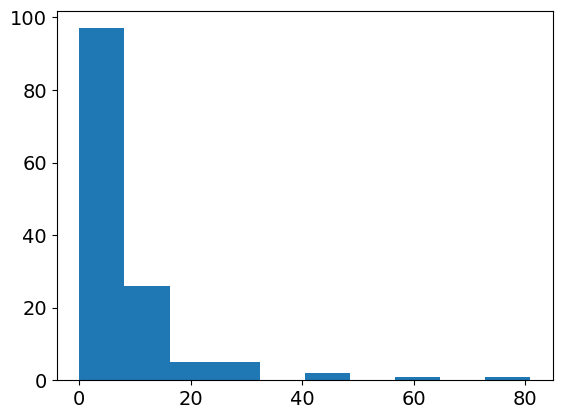

In [4]:
plt.hist(df.dko_udder_dim_cl)

(array([91., 22.,  8.,  6.,  3.,  4.,  1.,  1.,  0.,  1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

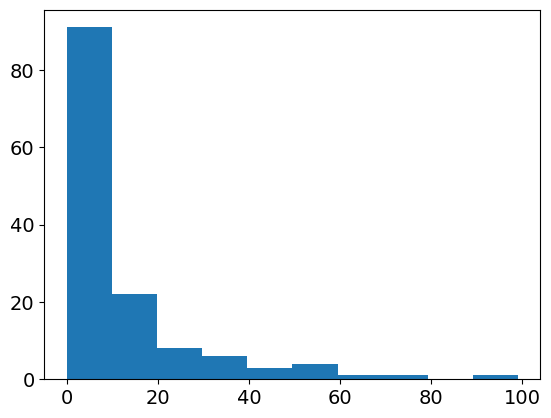

In [5]:
plt.hist(df.vko_udder_cl)

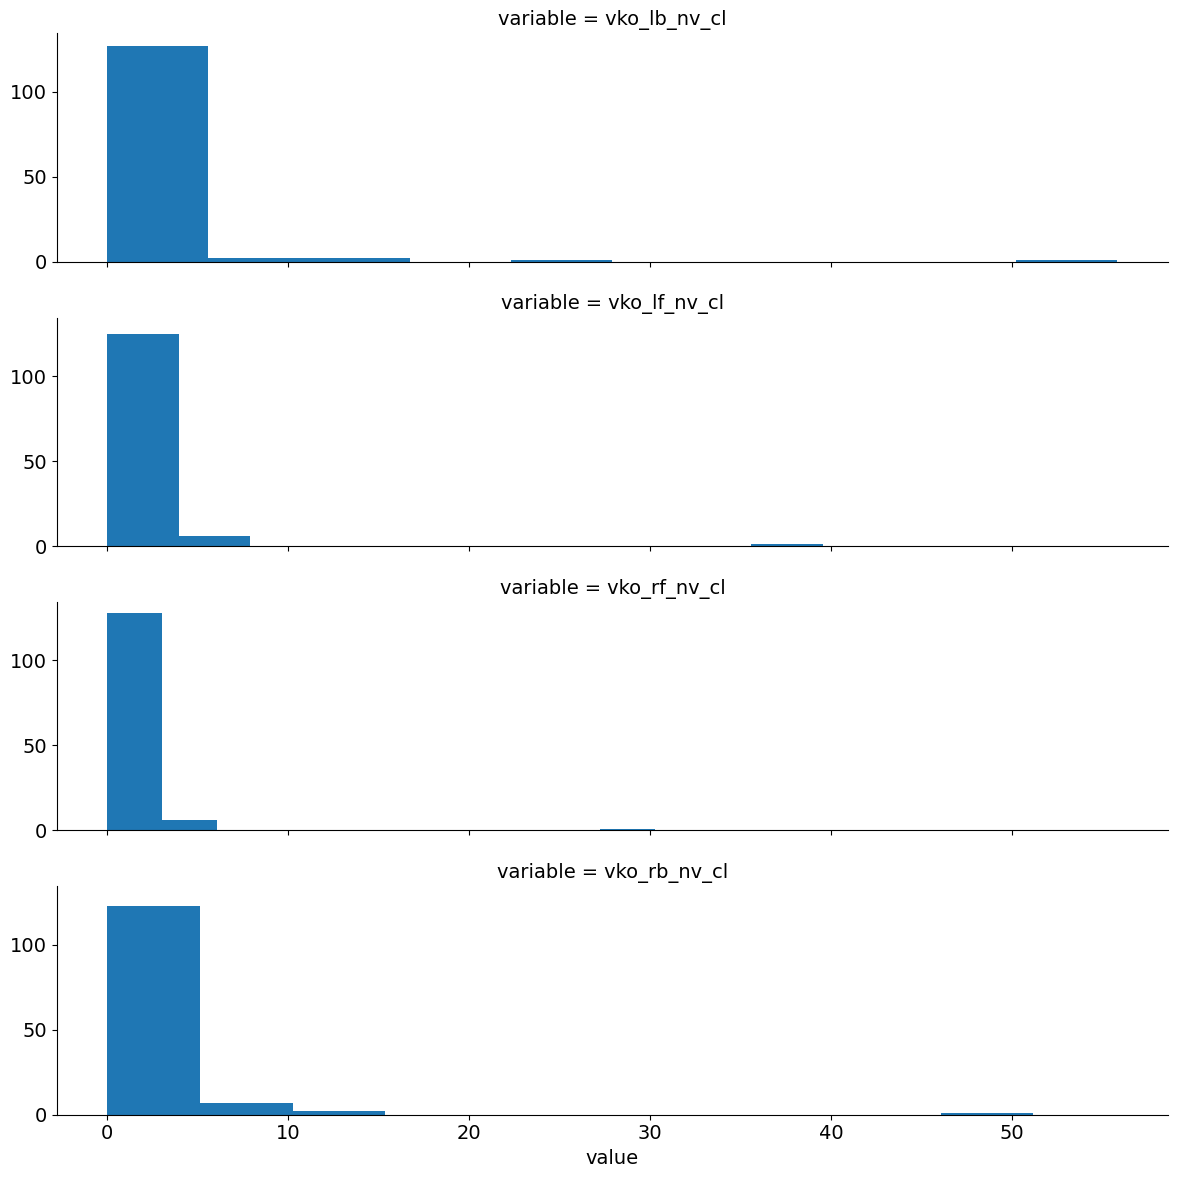

In [6]:
mdf= df.melt(id_vars = ['cow'],  value_vars=['vko_lb_nv_cl', 'vko_lf_nv_cl', 'vko_rf_nv_cl','vko_rb_nv_cl'])
graph = sns.FacetGrid(mdf, row ="variable",aspect=4)
graph.map(plt.hist, "value")

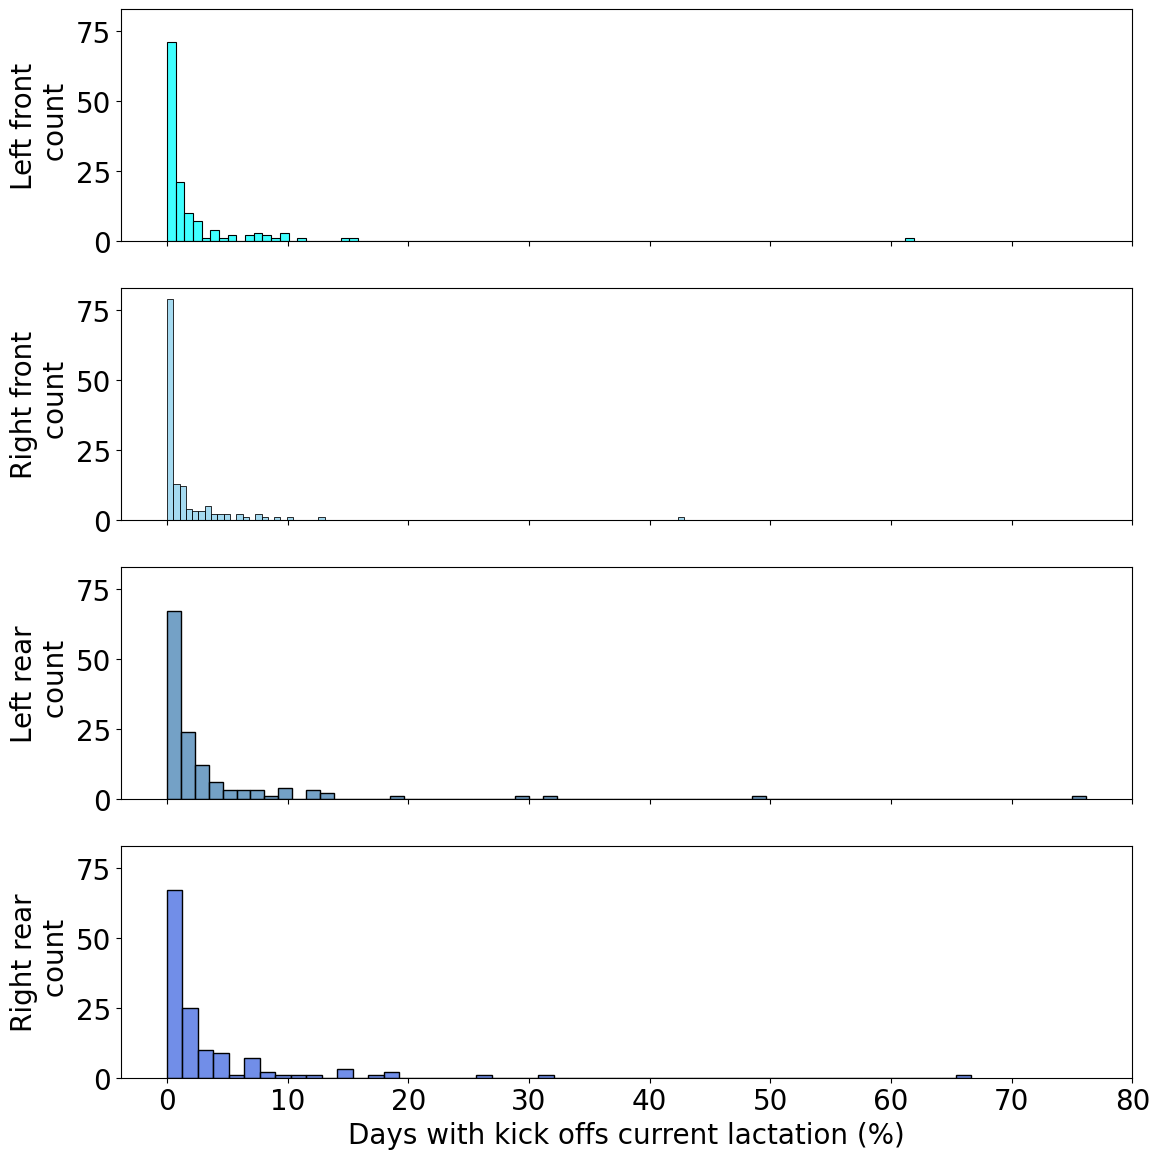

In [17]:
# sns.set(style='ticks')
my_colors = ["cyan",'skyblue' , "steelblue",  
             "royalblue", 'dodgerblue'] 
plt.rcParams.update({'font.size': 20})
# add color array to set_palette 
# function of seaborn 
sns.set_palette( my_colors ) 
column_dict ={'dko_udder_dim_cl':'Udder', 'dko_lb_dim_cl':'Left rear', 'dko_lf_dim_cl':'Left front', 'dko_rf_dim_cl': 'Right front','dko_rb_dim_cl':'Right rear'}
mdf= df.melt(id_vars = ['cow'],  value_vars=['dko_lf_dim_cl', 'dko_rf_dim_cl','dko_lb_dim_cl','dko_rb_dim_cl'])
graph = sns.FacetGrid(mdf, row ="variable", hue ="variable",height=3, aspect=4, margin_titles=True, despine=False)
graph.map(sns.histplot, "value")
graph.set_titles(row_template = '{row_name}')
graph.set_xlabels(label="Days with kick offs current lactation (%)", clear_inner=True)
for ax in graph.axes.flat:
    var = ax.texts[0].get_text()
    name = column_dict[var] + "\n count"
    ax.set_ylabel(name)
graph.set_titles(row_template = '')
graph.tight_layout()
plt.savefig(os.path.join(plot_dir, "ko_hist_all.png"),bbox_inches='tight')

In [43]:
print(sum(df["ko_vcow"]))
print(sum(df["ko_vleft"]))
print(sum(df["ko_vright"]))
print(sum(df["ko_vback"]))
print(sum(df["ko_vfront"]))

25
8
11
11
4


In [21]:
mdf = pd.melt(df, value_vars = ['back_eu', 'front_eu', 'right_eu', 'left_eu'], id_vars =['cow', "ko_vcow", "ko_vright","ko_vback", "ko_vfront", "ko_vleft"])

<Axes: xlabel='variable', ylabel='value'>

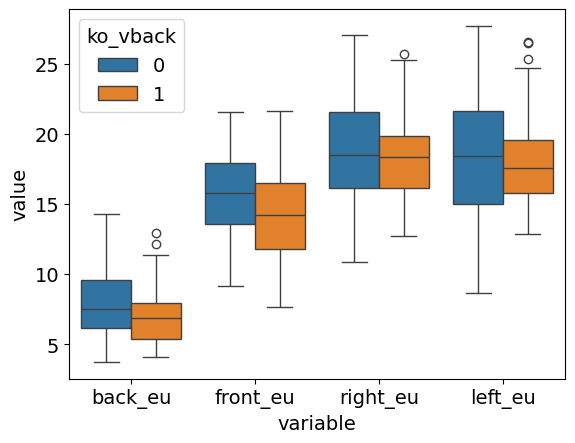

In [23]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_vback")

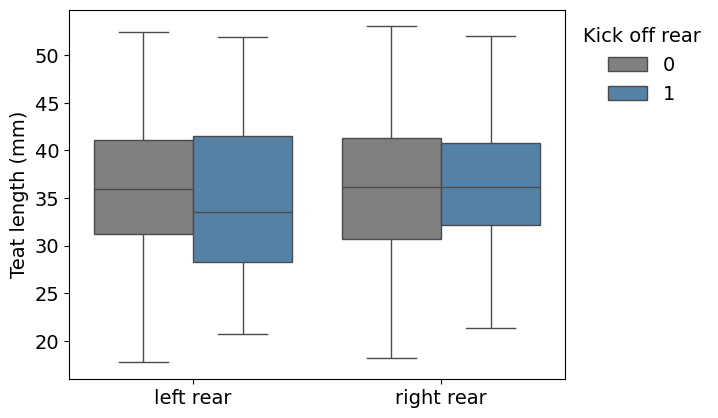

In [29]:
my_colors = ["gray", "steelblue",  
             "royalblue", "skyblue"]
sns.set_palette( my_colors )
df2 = df.rename(columns={'lb_len': "left rear", 'rb_len': "right rear"})
mdf = pd.melt(df2, value_vars = ["left rear", "right rear"], id_vars =['cow', "ko_cow", "ko_right","ko_vback", "ko_vfront", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_vback")
plt.xlabel("")
plt.ylabel("Teat length (mm)")
plt.legend(title="Kick off rear")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),  frameon=False)
plt.savefig(os.path.join(plot_dir, "vbko_len.png"),bbox_inches='tight')

In [15]:
t = df2[["left rear", "right rear", "ko_back"]].dropna()
print(len(t))
sum(t["ko_back"])

114


27

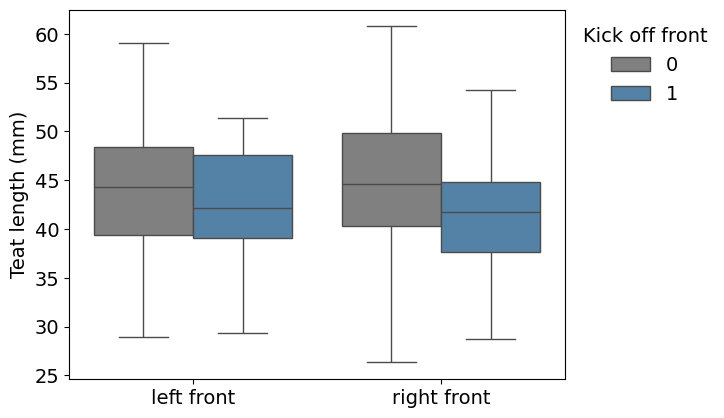

In [14]:
my_colors = ["gray", "steelblue",  
             "royalblue", "skyblue"]
sns.set_palette( my_colors )
df2 = df.rename(columns={'lf_len': "left front", 'rf_len': "right front"})
mdf = pd.melt(df2, value_vars = ["left front", "right front"], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_front")
plt.xlabel("")
plt.ylabel("Teat length (mm)")
plt.legend(title="Kick off front")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1),  frameon=False)
plt.savefig(os.path.join(plot_dir, "ko_front.png"),bbox_inches='tight')

In [15]:
t = df2[["left front", "right front", "ko_front"]].dropna()
print(len(t))
sum(t["ko_front"])

102


15

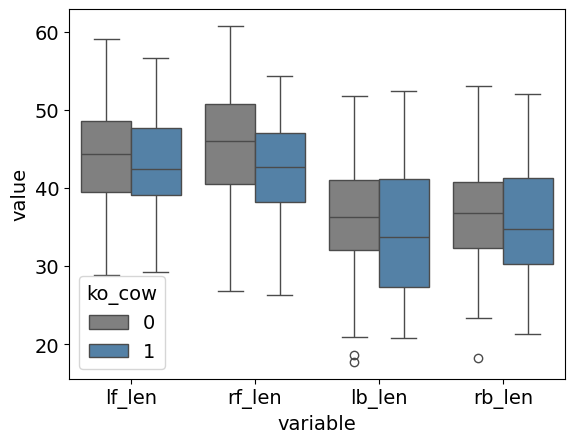

In [49]:
mdf = pd.melt(df, value_vars = ["lf_len", "rf_len", "lb_len", "rb_len"], id_vars =['cow', "ko_cow", "ko_right","ko_back", "ko_front", "ko_left"])
ax = sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_cow")

<Axes: xlabel='ko_front', ylabel='front_eu'>

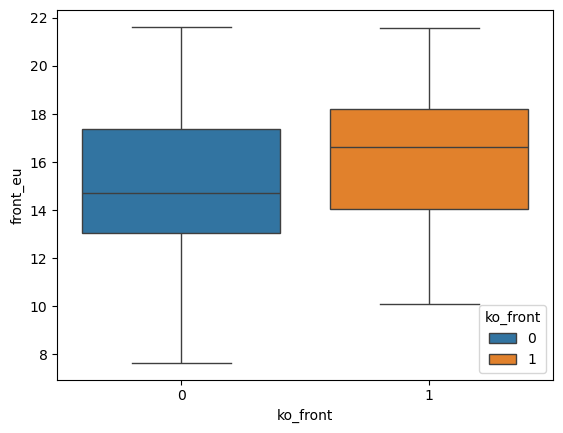

In [11]:
sns.boxplot(data=df, y="front_eu", x = "ko_front", hue = "ko_front")

<Axes: xlabel='ko_right', ylabel='right_eu'>

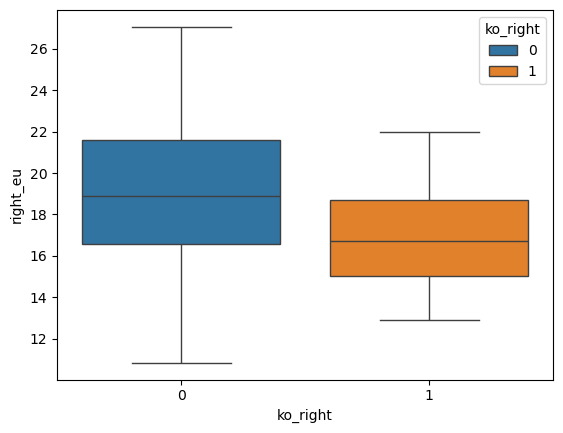

In [12]:
sns.boxplot(data=df, y="right_eu", x = "ko_right", hue = "ko_right")

<Axes: xlabel='ko_left', ylabel='left_eu'>

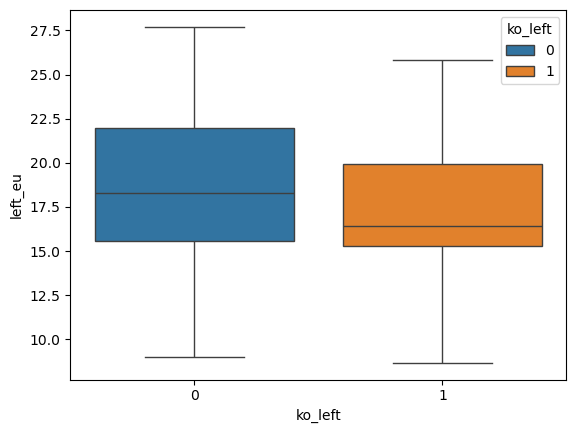

In [13]:
sns.boxplot(data=df, y="left_eu", x = "ko_left", hue = "ko_left")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

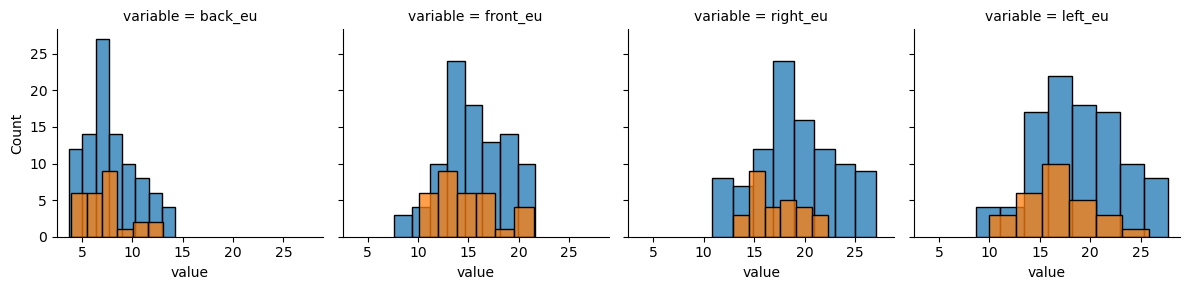

In [68]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_back")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

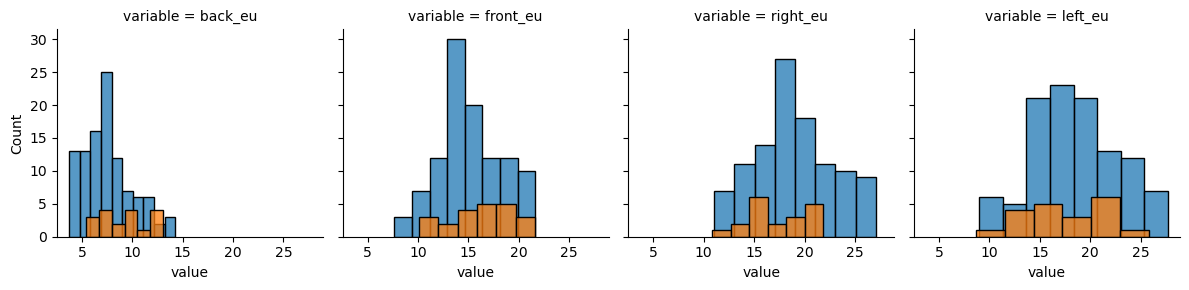

In [69]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_front")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

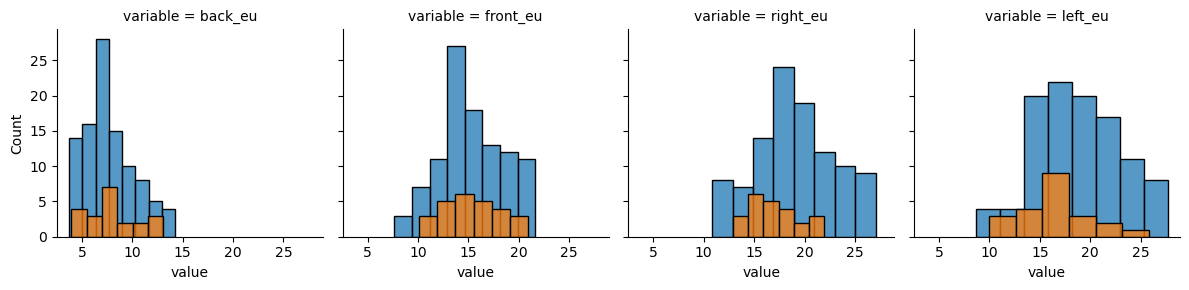

In [70]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_right")
graph.map(sns.histplot, "value")

C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

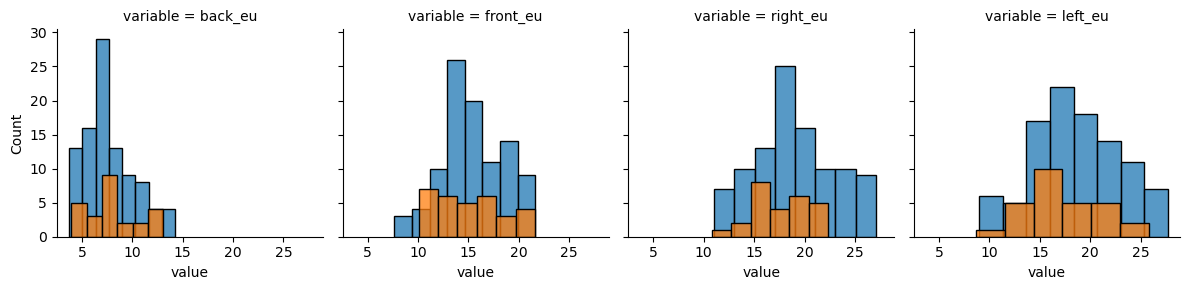

In [71]:
graph = sns.FacetGrid(mdf, col ="variable", hue = "ko_left")
graph.map(sns.histplot, "value")

<Axes: xlabel='variable', ylabel='value'>

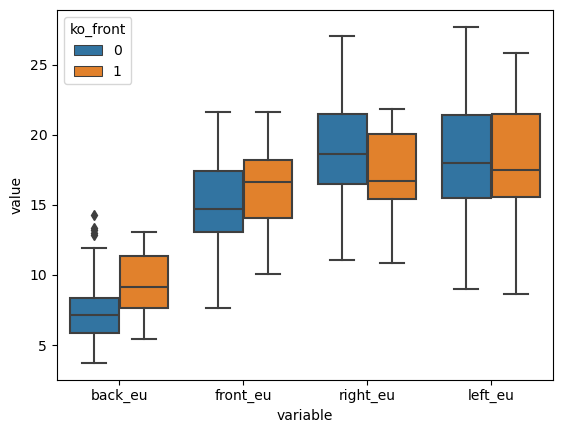

In [6]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_front")

<Axes: xlabel='variable', ylabel='value'>

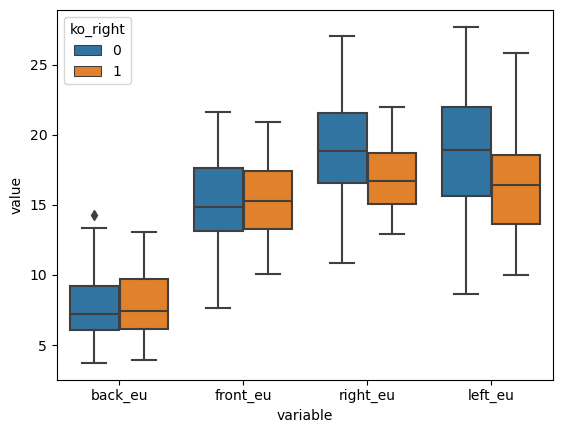

In [7]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_right")

<Axes: xlabel='variable', ylabel='value'>

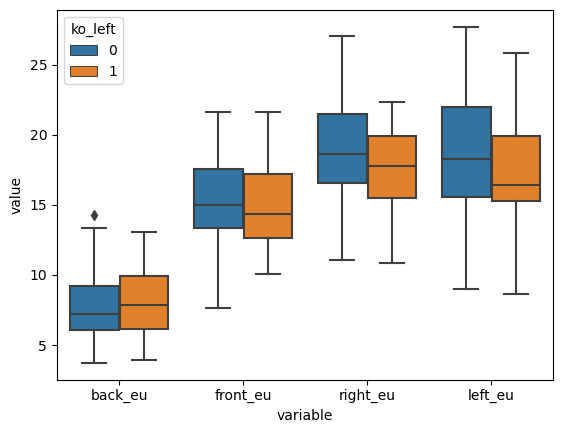

In [8]:
sns.boxplot(data=mdf, y="value", x = "variable", hue = "ko_left")

In [47]:
x_vars = ['back_eu', 'front_eu']
y_var = "ko_back"
vars =  x_vars + [y_var]
df2 = df[vars].dropna().reset_index()
X = df2[x_vars]
y = df2[y_var]

In [77]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
clf = svm.SVC(class_weight = {1 : 5, 0 : 1})
clf.fit(X_train, y_train)


array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [80]:
print(y_test - clf.predict(X_test))

80     0
4      0
40     0
69     0
10     0
45     0
70     0
66     0
47    -1
11     0
98     0
36     1
83     1
111    1
18    -1
0      0
72    -1
26    -1
81     0
53     0
104    1
91     1
12     0
31     0
67    -1
110    1
107    0
22    -1
44     0
108   -1
78     0
15     0
30    -1
103    0
9      0
33     0
62    -1
65     1
Name: ko_back, dtype: int64
